In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
plt.style.use("ggplot")

In [52]:
df=pd.read_csv("Downloads/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0


In [53]:
print("This dataframe has {} rows and {} columns".format(df.shape[0],df.shape[1]))

This dataframe has 284807 rows and 31 columns


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [55]:
pd.set_option("precision",3)
df.loc[:,["Time","Amount"]].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


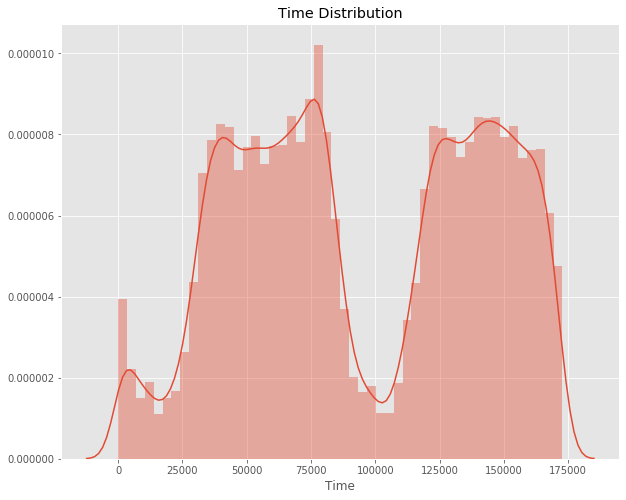

In [56]:
plt.figure(figsize=(10,8))
plt.title("Time Distribution")
sns.distplot(df.Time)

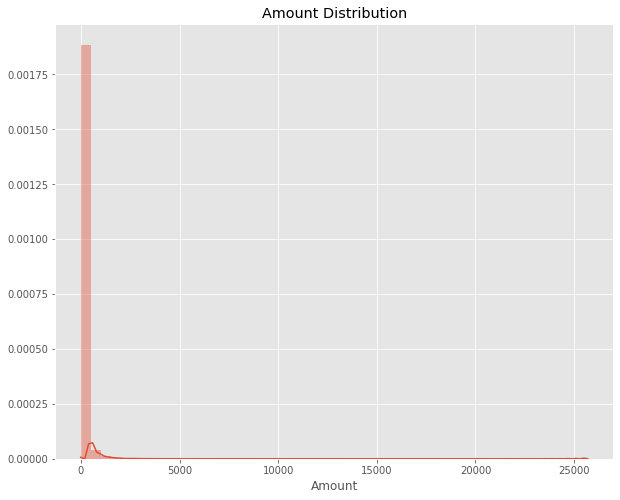

In [57]:
plt.figure(figsize=(10,8))
plt.title("Amount Distribution")
sns.distplot(df.Amount)

In [58]:
res=df.Class.value_counts()
normal=res[0]
fraud=res[1]
perc_normal=((normal)/(normal+fraud))*100
perc_fraud=((fraud)/(normal+fraud))*100
print("There are {} non-fraudulent transactions {:.3f}% and {} fraudulent transactions {:.3f}%".format(normal,
                                                                                                         perc_normal,fraud,perc_fraud))

There are 284315 non-fraudulent transactions 99.827% and 492 fraudulent transactions 0.173%


Text(0, 0.5, 'Count')

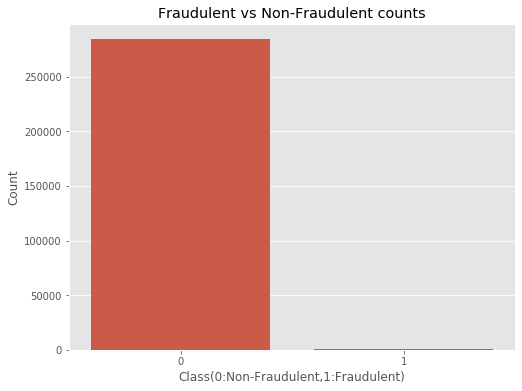

In [59]:
plt.figure(figsize=(8,6))
sns.barplot(x=res.index,y=res)
plt.title("Fraudulent vs Non-Fraudulent counts")
plt.xlabel("Class(0:Non-Fraudulent,1:Fraudulent)")
plt.ylabel("Count")

In [60]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


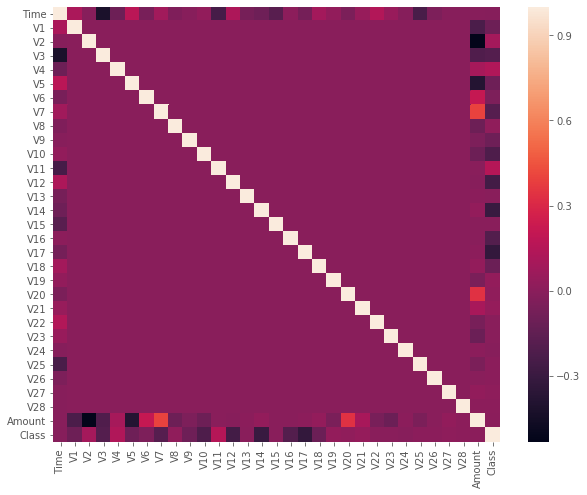

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())


In [62]:
skew_=df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
res=sc.fit_transform([df.Time])
list1=[ elem for sub in res.tolist()for elem in sub]
list1[:5]
scaled_time=pd.Series(list1)
scaled_time.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [64]:
res=sc.fit_transform([df.Amount])
list1=[ elem for sub in res.tolist() for elem in sub]
scaled_amount=pd.Series(list1)
scaled_amount.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [65]:
df=pd.concat([df,scaled_time.rename("scaled_time"),scaled_amount.rename("scaled_amount")],axis=1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_time,scaled_amount
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0,0.0,0.0
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0,0.0,0.0
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0,0.0,0.0
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0,0.0,0.0
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0,0.0,0.0


In [66]:
df.drop(["Time","Amount"],axis=1,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,...,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0,0.0,0.0
1,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,...,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0,0.0,0.0
2,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,...,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0,0.0,0.0
3,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,...,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0,0.0,0.0
4,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,...,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0,0.0,0.0


##Splitting data into train and test

In [72]:
mask=np.random.rand(len(df))<0.9
train=df[mask]
test=df[~mask]
print("Train Shape:{}\nTest Shape:{}".format(train.shape,test.shape))

Train Shape:(256476, 31)
Test Shape:(28331, 31)


In [74]:
test.reset_index(drop=True,inplace=True)
test.head()  

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,1.250,-1.222,0.384,-1.235,-1.485,-0.753,-0.689,-0.227,-2.094,1.324,...,-0.483,0.085,3.928e-01,0.161,-0.355,0.026,0.042,0,0.0,0.0
1,-5.401,-5.450,1.186,1.736,3.049,-1.763,-1.560,0.161,1.233,0.345,...,0.984,2.459,4.212e-02,-0.482,-0.621,0.392,0.950,0,0.0,0.0
2,-2.074,-0.121,1.322,0.410,0.295,-0.960,0.544,-0.105,0.476,0.149,...,-0.227,0.742,3.985e-01,0.249,0.274,0.360,0.243,0,0.0,0.0
3,-0.414,0.905,1.727,1.473,0.007,-0.200,0.740,-0.029,-0.593,-0.346,...,0.457,-0.038,6.425e-01,-0.184,-0.277,0.183,0.153,0,0.0,0.0
4,-0.535,0.865,1.351,0.148,0.434,0.087,0.693,0.180,-0.286,-0.482,...,0.207,-0.187,7.530e-04,0.098,-0.553,-0.078,0.025,0,0.0,0.0


In [76]:
train.reset_index(drop=True,inplace=True)
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,...,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0,0.0,0.0
1,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,...,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0,0.0,0.0
2,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,...,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0,0.0,0.0
3,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,...,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0,0.0,0.0
4,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,...,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0,0.0,0.0


###Creating a subsample dataset with balanced class distribution

In [84]:
no_of_fraud=train.Class.value_counts()[1]
print("There are {} fraud data in train dataset".format(no_of_fraud))

There are 440 fraud data in train dataset


In [85]:
non_fraud=train[train["Class"]==0]
fraud=train[train["Class"]==1]


In [87]:
selected=non_fraud.sample(no_of_fraud)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
200542,-0.455,1.392,-0.548,0.915,0.716,-0.591,0.875,0.316,-0.557,-0.164,...,0.413,-0.202,0.699,0.027,-0.403,0.297,0.177,0,0.0,0.0
150078,1.930,-0.513,-0.530,-0.010,-0.531,-0.268,-0.535,0.093,1.104,-0.037,...,-0.538,0.344,-0.467,-0.536,-0.318,-0.005,-0.048,0,0.0,0.0
81302,1.212,0.230,0.256,0.654,-0.278,-0.628,-0.062,-0.006,0.187,-0.296,...,-0.801,0.171,0.005,0.108,0.128,-0.013,0.025,0,0.0,0.0
162352,-2.251,0.861,1.791,3.502,-0.892,2.004,-1.161,1.409,0.184,0.520,...,0.749,0.092,0.491,-0.322,0.087,-0.254,0.126,0,0.0,0.0
161354,1.961,-0.688,-0.530,0.238,-0.590,0.185,-0.882,0.252,1.309,0.213,...,0.548,0.077,-0.788,-0.291,0.604,-0.034,-0.066,0,0.0,0.0


In [88]:
selected.shape

(440, 31)

In [91]:
selected.reset_index(drop=True,inplace=True)
fraud.reset_index(drop=True,inplace=True)

In [92]:
subsample=pd.concat([selected,fraud])
subsample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-0.455,1.392,-0.548,0.915,0.716,-0.591,0.875,0.316,-0.557,-0.164,...,0.413,-0.202,0.699,0.027,-0.403,0.297,0.177,0,0.0,0.0
1,1.930,-0.513,-0.530,-0.010,-0.531,-0.268,-0.535,0.093,1.104,-0.037,...,-0.538,0.344,-0.467,-0.536,-0.318,-0.005,-0.048,0,0.0,0.0
2,1.212,0.230,0.256,0.654,-0.278,-0.628,-0.062,-0.006,0.187,-0.296,...,-0.801,0.171,0.005,0.108,0.128,-0.013,0.025,0,0.0,0.0
3,-2.251,0.861,1.791,3.502,-0.892,2.004,-1.161,1.409,0.184,0.520,...,0.749,0.092,0.491,-0.322,0.087,-0.254,0.126,0,0.0,0.0
4,1.961,-0.688,-0.530,0.238,-0.590,0.185,-0.882,0.252,1.309,0.213,...,0.548,0.077,-0.788,-0.291,0.604,-0.034,-0.066,0,0.0,0.0


In [93]:
len(subsample)

880

##Shuffling the subsample dataset

In [95]:
subsample=subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-4.153,8.205,-15.032,10.330,-3.994,-3.250,-10.416,4.621,-5.711,-11.797,...,0.257,0.486,-1.199,-0.527,0.635,1.627e+00,0.723,1,0.0,0.0
1,-21.885,12.931,-24.099,6.203,-16.466,-4.460,-16.520,14.536,-3.897,-8.651,...,-1.579,-0.951,0.135,1.507,-0.223,1.528e+00,0.454,1,0.0,0.0
2,2.182,-0.726,-1.069,-0.971,-0.710,-1.097,-0.522,-0.247,-0.724,1.033,...,1.164,0.070,0.122,0.026,-0.062,-3.230e-02,-0.071,0,0.0,0.0
3,1.828,-0.085,-1.977,0.210,1.240,1.022,-0.062,0.336,0.371,-0.623,...,-0.520,0.455,-0.807,-0.626,0.275,-5.677e-04,-0.035,0,0.0,0.0
4,-8.744,-3.420,-4.851,6.607,-2.801,0.106,-3.270,0.940,-2.559,-3.625,...,0.312,-4.129,0.035,-1.134,0.272,1.841e+00,-1.796,1,0.0,0.0
5,2.132,0.706,-3.531,0.515,1.527,-1.716,1.133,-0.574,0.129,-1.001,...,0.704,-0.245,0.460,0.920,-0.217,-2.622e-02,-0.025,1,0.0,0.0
6,-7.334,4.961,-8.451,8.175,-7.237,-2.383,-11.509,4.636,-6.558,-11.520,...,0.034,-0.014,0.625,-0.053,0.165,1.411e+00,0.316,1,0.0,0.0
7,0.922,-0.061,0.067,1.260,-0.251,-0.748,0.489,-0.202,-0.163,-0.084,...,0.055,-0.146,0.401,0.558,-0.363,-6.357e-03,0.041,0,0.0,0.0
8,1.708,0.025,-0.488,3.788,1.139,2.915,-0.743,0.699,1.008,0.913,...,0.548,0.091,-1.008,-0.082,0.180,7.738e-03,-0.069,1,0.0,0.0
9,-1.290,0.493,3.019,2.690,0.323,0.536,-0.622,0.279,-0.767,1.494,...,0.904,-0.358,0.032,0.076,0.395,3.342e-01,0.053,0,0.0,0.0


Text(0, 0.5, 'Count')

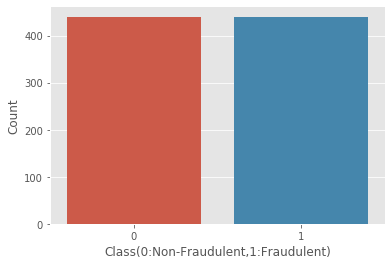

In [97]:
new_counts=subsample.Class.value_counts()
sns.barplot(new_counts.index,new_counts)
plt.xlabel("Class(0:Non-Fraudulent,1:Fraudulent)")
plt.ylabel("Count")

In [99]:
corr=subsample.corr()
corr[["Class"]]

,Class
V1,-0.435
V2,0.478
V3,-0.561
V4,0.716
V5,-0.377
V6,-0.370
V7,-0.475
V8,0.036
V9,-0.545
V10,-0.623


In [107]:
##Negative Corrlations less than -0.5
corr[corr.Class<-0.5]["Class"]

V3    -0.561
V9    -0.545
V10   -0.623
V12   -0.683
V14   -0.749
V16   -0.603
V17   -0.562
Name: Class, dtype: float64

In [108]:
##Positive Correlations greater than 0.5
corr[corr.Class>0.5]["Class"]

V4       0.716
V11      0.675
Class    1.000
Name: Class, dtype: float64

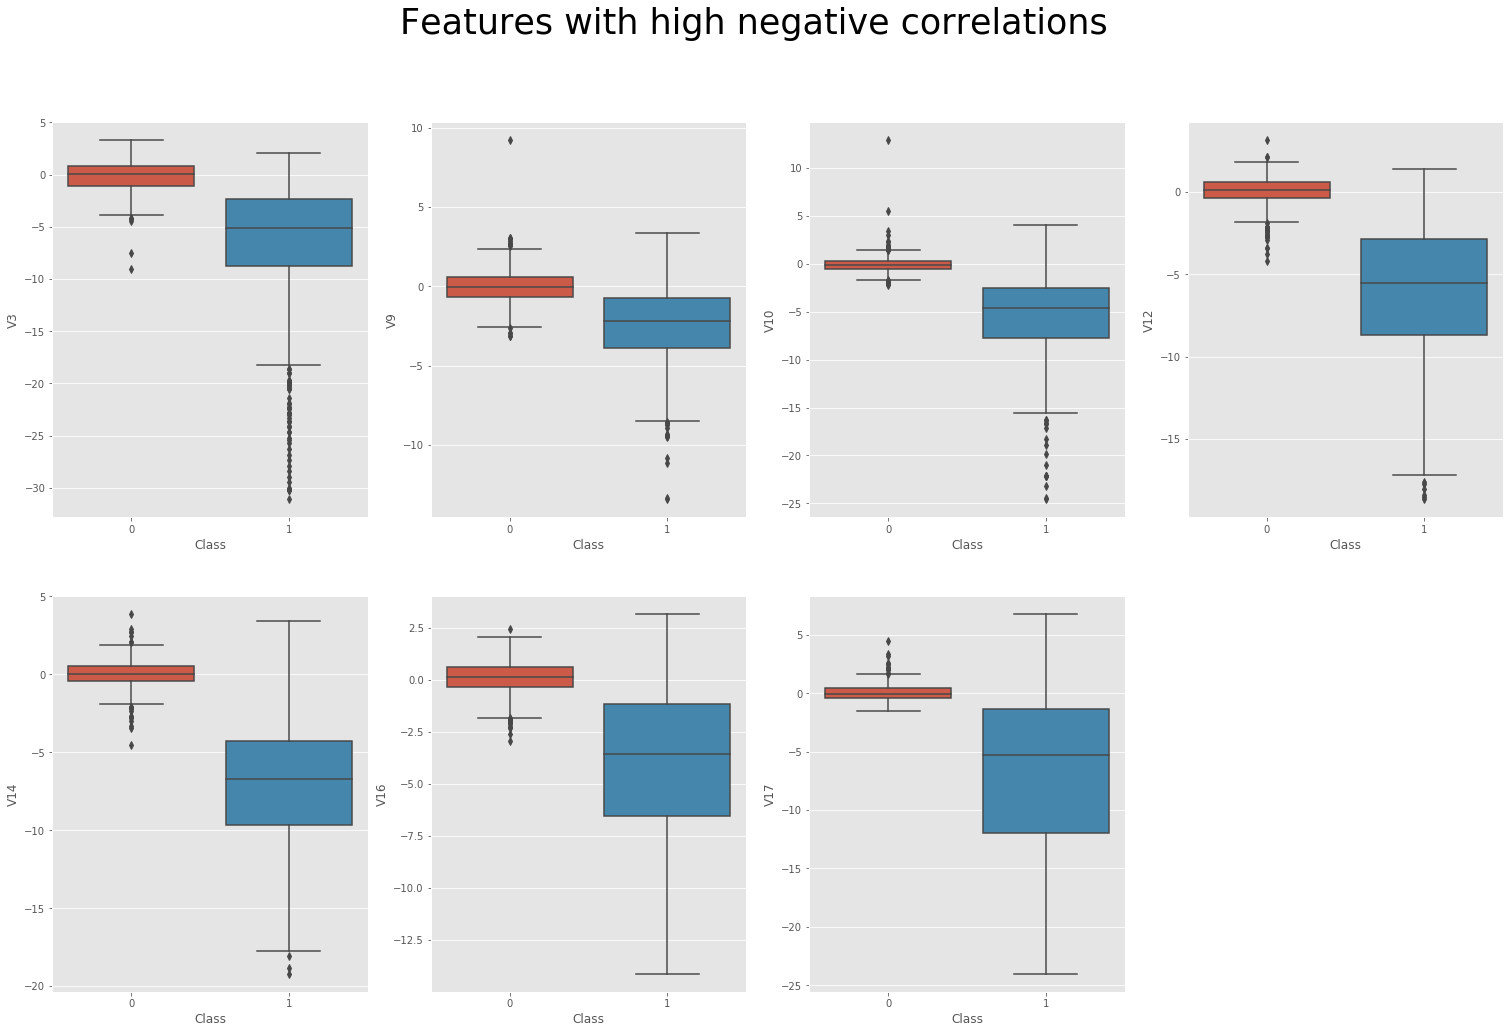

In [119]:
##Visualizing the features with high negative correlations
f,axes=plt.subplots(nrows=2,ncols=4,figsize=(26,16))
f.suptitle("Features with high negative correlations",size=35)
sns.boxplot(x="Class",y="V3",data=subsample,ax=axes[0,0])
sns.boxplot(x="Class",y="V9",data=subsample,ax=axes[0,1])
sns.boxplot(x="Class",y="V10",data=subsample,ax=axes[0,2])
sns.boxplot(x="Class",y="V12",data=subsample,ax=axes[0,3])
sns.boxplot(x="Class",y="V14",data=subsample,ax=axes[1,0])
sns.boxplot(x="Class",y="V16",data=subsample,ax=axes[1,1])
sns.boxplot(x="Class",y="V17",data=subsample,ax=axes[1,2])
f.delaxes(axes[1,3])

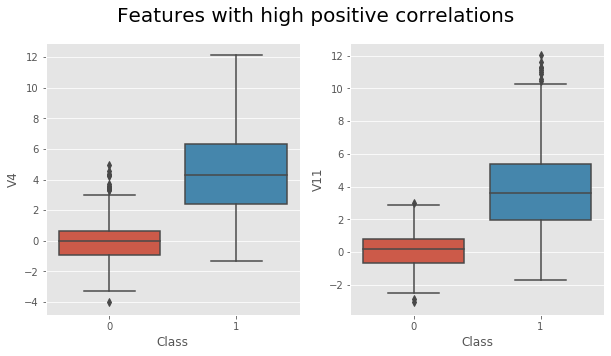

In [130]:
f,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
f.suptitle("Features with high positive correlations",size=20)
sns.boxplot(x="Class",y="V4",data=subsample,ax=axes[0])
sns.boxplot(x="Class",y="V11",data=subsample,ax=axes[1])

In [145]:
Q1=subsample.quantile(0.25)
Q3=subsample.quantile(0.75)
IQR=Q3-Q1
df2=subsample[~((subsample<(Q1-2.5*IQR))|(subsample>(Q3+2.5*IQR))).any(axis=1)]
df2


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
2,2.182,-0.726,-1.069,-0.971,-0.710,-1.097,-0.522,-0.247,-0.724,1.033,...,1.164,0.070,0.122,0.026,-0.062,-3.230e-02,-0.071,0,0.0,0.0
3,1.828,-0.085,-1.977,0.210,1.240,1.022,-0.062,0.336,0.371,-0.623,...,-0.520,0.455,-0.807,-0.626,0.275,-5.677e-04,-0.035,0,0.0,0.0
5,2.132,0.706,-3.531,0.515,1.527,-1.716,1.133,-0.574,0.129,-1.001,...,0.704,-0.245,0.460,0.920,-0.217,-2.622e-02,-0.025,1,0.0,0.0
7,0.922,-0.061,0.067,1.260,-0.251,-0.748,0.489,-0.202,-0.163,-0.084,...,0.055,-0.146,0.401,0.558,-0.363,-6.357e-03,0.041,0,0.0,0.0
8,1.708,0.025,-0.488,3.788,1.139,2.915,-0.743,0.699,1.008,0.913,...,0.548,0.091,-1.008,-0.082,0.180,7.738e-03,-0.069,1,0.0,0.0
9,-1.290,0.493,3.019,2.690,0.323,0.536,-0.622,0.279,-0.767,1.494,...,0.904,-0.358,0.032,0.076,0.395,3.342e-01,0.053,0,0.0,0.0
10,1.228,-1.573,-0.102,-1.053,-1.664,-1.034,-0.607,-0.242,-1.535,1.374,...,-0.328,-0.199,0.356,0.555,-0.074,-2.607e-02,0.032,0,0.0,0.0
11,1.821,-1.231,-1.722,-0.451,-0.245,-0.047,-0.231,-0.113,-0.517,0.869,...,0.424,-0.149,0.232,0.181,-0.057,-2.756e-02,-0.032,0,0.0,0.0
12,-0.742,1.103,-2.067,-1.662,3.226,3.111,0.377,0.547,0.230,-0.395,...,0.726,-0.243,0.619,-0.053,-0.247,-8.877e-01,0.122,0,0.0,0.0
14,-4.194,4.383,-5.118,4.455,-4.813,-1.225,-7.281,3.332,-3.680,-7.524,...,0.615,0.029,0.014,-0.150,-0.132,4.739e-01,0.474,1,0.0,0.0


In [146]:
len_after=len(df2)
len_before=len(subsample)
diff=len_before-len_after
print("We reduced our dataset from {} to {} by {}".format(len_before,len_after,diff))

We reduced our dataset from 880 to 653 by 227


In [148]:
from sklearn.manifold import TSNE
X=df2.drop("Class",axis=1)
Y=df2["Class"]

In [149]:
x_reduced_tsne=TSNE(n_components=2,random_state=42).fit_transform(X.values)
x_reduced_tsne

array([[-24.351273 ,  13.373644 ],
       [-15.530556 ,  18.908903 ],
       [  0.9155681,   4.7213044],
       ...,
       [ 56.513653 ,   1.606623 ],
       [-28.087944 ,  11.414244 ],
       [-13.094834 , -27.138615 ]], dtype=float32)

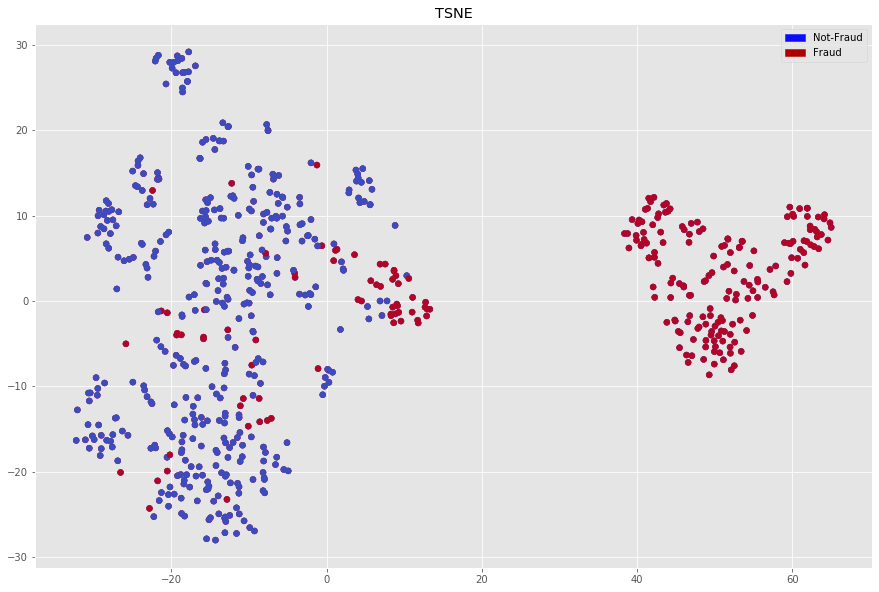

In [174]:
import matplotlib.patches as mpatch
blue_patch=mpatch.Patch(color="#0A0AFF",label="Not-Fraud")
red_patch=mpatch.Patch(color="#AF0000",label="Fraud")
f,axes=plt.subplots(figsize=(15,10))
axes.scatter(x_reduced_tsne[:,0],x_reduced_tsne[:,1],cmap="coolwarm",c=(Y==0),label="Not-Fraud")
axes.scatter(x_reduced_tsne[:,0],x_reduced_tsne[:,1],cmap="coolwarm",c=(Y==1),label="Fraud")
plt.title("TSNE")
plt.legend(handles=[blue_patch,red_patch])
plt.grid(True)

##Classification ALgorithm

In [176]:
##Splitting the dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [177]:
X_train=X_train.values
X_validation=X_test.values
Y_train=Y_train.values
Y_validation=Y_test.values

In [178]:
print("X_Shapes\nX_train:X_validation\n",X_train.shape,X_validation.shape)

X_Shapes
X_train:X_validation
 (522, 30) (131, 30)


In [179]:
print("Y_Shapes\nY_train:Y_validation\n",Y_train.shape,Y_validation.shape)

Y_Shapes
Y_train:Y_validation
 (522,) (131,)


In [241]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [242]:
def abc(*args,**kwargs):
    pass
import warnings
warnings.warn=abc

In [243]:
models=[]
models.append(("LR",LogisticRegression()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("SVM",SVC()))
models.append(("CART",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("XGB",XGBClassifier()))
models.append(("LDA",LinearDiscriminantAnalysis()))


In [249]:
names=[]
results=[]
for name,model in models:
    names.append(name)
    kfold=KFold(n_splits=10,random_state=42)
    scores=cross_val_score(model,X,Y,cv=kfold,scoring="roc_auc")
    results.append(scores)
    msg="%s:%f:(%f)" %(name,scores.mean(),scores.std())
    print(msg)


LR:0.973854:(0.019602)
KNN:0.961229:(0.024652)
SVM:0.968327:(0.021537)
CART:0.884542:(0.038814)


C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ankita\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

RF:0.957113:(0.032476)
XGB:0.970267:(0.016935)
LDA:0.974310:(0.018895)


Text(0.5, 0, 'Algorithm')

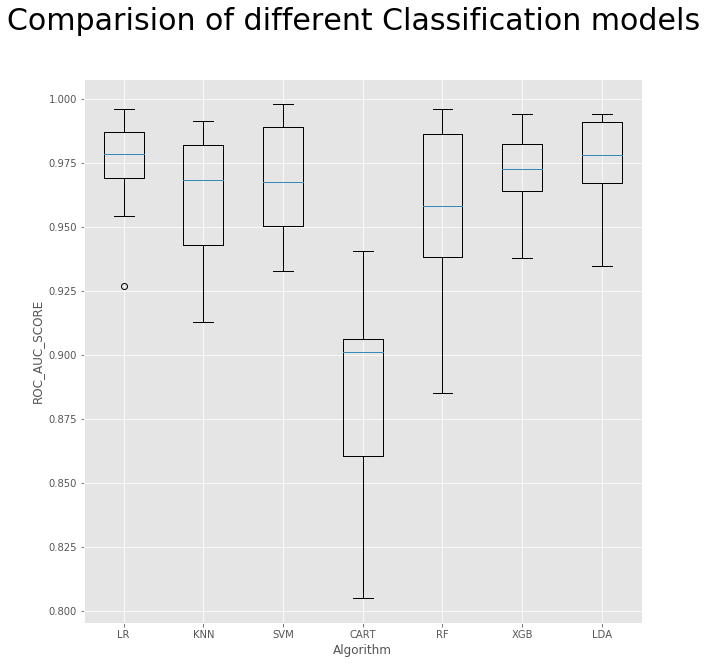

In [250]:
fig=plt.figure(figsize=(10,10))
plt.boxplot(results)
ax=fig.add_subplot(111)
ax.set_xticklabels(names)
fig.suptitle("Comparision of different Classification models",size=30)
plt.ylabel("ROC_AUC_SCORE")
plt.xlabel("Algorithm")

In [251]:
model=RandomForestClassifier(n_estimators=10)
model.fit(X_train,Y_train)
estimator=model.estimators_[5]
estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1485287858, splitter='best')

In [252]:
from sklearn.tree import export_graphviz
export_graphviz(estimator,out_file="tree.png",feature_names=X.columns.tolist(),
               class_names=["0","1"],filled=True,rounded=True,proportion=False,precision=2)

In [253]:
from IPython.display import Image
Image(filename="tree.png")